In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
cam_pos = np.load('./cam_pos.npy')
sonar_pos = np.load('./sonar_pos.npy')
kf_pos = np.load('./kf_pos.npy')
kf_cov = np.load('./kf_cov.npy')
true_pos = np.load('./true_pos.npy')

In [15]:
print(kf_pos.shape)
print(true_pos.shape)

print(kf_pos[:10])
print(true_pos[:10])

(667, 4)
(156, 4)
[[ 2.86860000e+01  8.66658495e-01  9.86763140e-02  0.00000000e+00]
 [ 2.87020000e+01  8.66658495e-01  9.86763140e-02  0.00000000e+00]
 [ 2.87040000e+01  8.66658495e-01  9.86763140e-02  0.00000000e+00]
 [ 2.87220000e+01  8.66658495e-01  9.86763140e-02  0.00000000e+00]
 [ 2.87240000e+01  8.73835927e-01  1.15907084e-01 -1.25676502e-03]
 [ 2.87420000e+01  8.73847714e-01  1.15935381e-01 -1.25803740e-03]
 [ 2.87540000e+01  1.27575138e+00  1.52414545e-01 -1.25803726e-03]
 [ 2.87720000e+01  1.27657965e+00  1.52518842e-01 -1.25930964e-03]
 [ 2.87820000e+01  1.27740792e+00  1.52623140e-01 -1.26058202e-03]
 [ 2.87860000e+01  1.28071291e+00  1.60718338e-01 -2.28160468e-03]]
[[ 2.86700000e+01  1.79850483e+00  2.27857001e-01 -2.67573954e-02]
 [ 2.87200000e+01  1.79850373e+00  2.20016357e-01 -2.69766742e-02]
 [ 2.87700000e+01  1.79850261e+00  2.12172337e-01 -2.71958741e-02]
 [ 2.88200000e+01  1.79850149e+00  2.04330079e-01 -2.74149322e-02]
 [ 2.88700000e+01  1.79850036e+00  1.964842

Text(0, 0.5, 'y (object relative sideways movement) [m]')

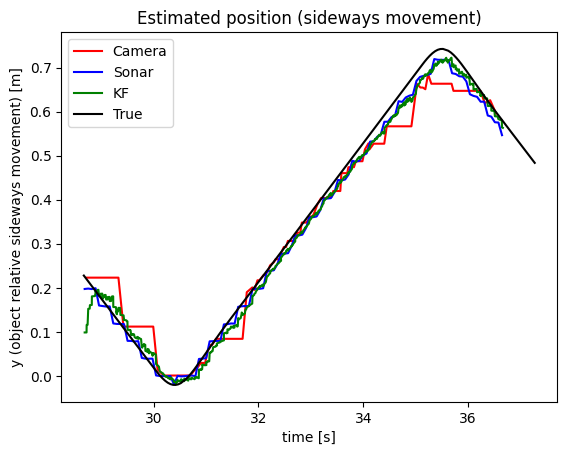

In [4]:
# Plot
plt.figure()
plt.plot(cam_pos[:,0], cam_pos[:,2], 'r', label='Camera')
plt.plot(sonar_pos[:,0], sonar_pos[:,2], 'b', label='Sonar')
plt.plot(kf_pos[:,0], kf_pos[:,2], 'g', label='KF')
plt.plot(true_pos[:,0], true_pos[:,2], 'k', label='True')
plt.legend()
plt.title('Estimated position (sideways movement)')
plt.xlabel('time [s]')
plt.ylabel('y (object relative sideways movement) [m]')

Mean error: 0.10796046229663588
Max error: 0.9411382500133709
Min error: 0.06217331373919705
Std error: 0.10898564408120812


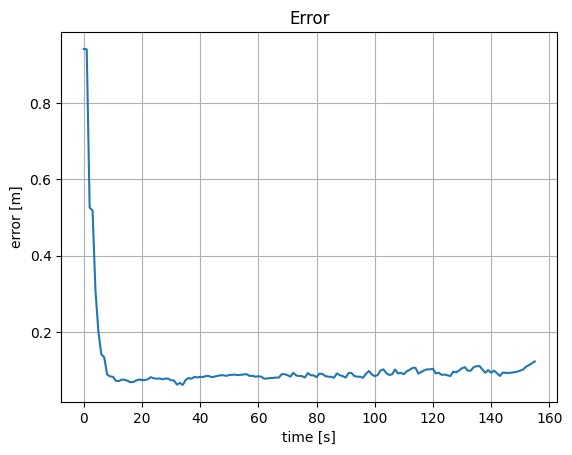

In [17]:
# Calculate error
kf_error = []
for i in range(true_pos.shape[0]):
    true_pos_time = true_pos[i,0]
    # Find the closest time in kf_pos
    kf_time = kf_pos[np.abs(kf_pos[:,0] - true_pos_time).argmin(),0]
    # Find the index of the closest time
    kf_index = np.where(kf_pos[:,0] == kf_time)[0][0]
    # Calculate the error
    error = np.linalg.norm(true_pos[i,1:4] - kf_pos[kf_index,1:4])
    kf_error.append(error)
kf_error = np.array(kf_error)
print('Mean error:', np.mean(kf_error))
print('Max error:', np.max(kf_error))
print('Min error:', np.min(kf_error))
print('Std error:', np.std(kf_error))

plt.figure()
plt.plot(kf_error)
plt.title('Error')
plt.xlabel('time [s]')
plt.ylabel('error [m]')
plt.grid()
plt.show()

Text(0, 0.5, 'x (dist to object) [m]')

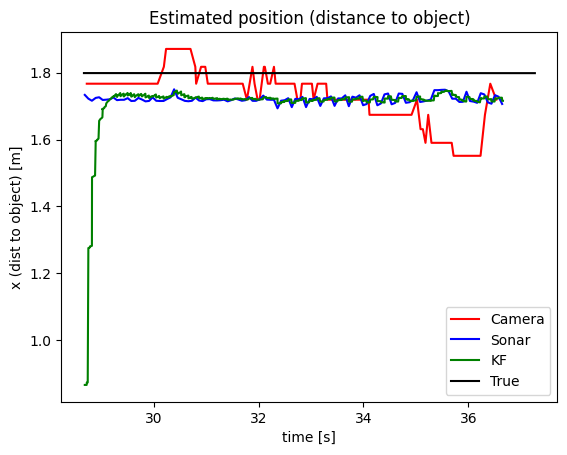

In [7]:
# Plot
plt.figure()
plt.plot(cam_pos[:,0], cam_pos[:,1], 'r', label='Camera')
plt.plot(sonar_pos[:,0], sonar_pos[:,1], 'b', label='Sonar')
plt.plot(kf_pos[:,0], kf_pos[:,1], 'g', label='KF')
plt.plot(true_pos[:,0], true_pos[:,1], 'k', label='True')
plt.legend()
plt.title('Estimated position (distance to object)')
plt.xlabel('time [s]')
plt.ylabel('x (dist to object) [m]')

Text(0, 0.5, 'y (object relative sideways movement) [m]')

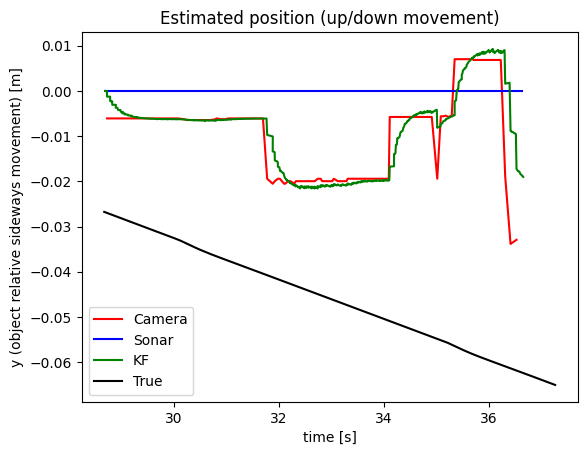

In [8]:
# Plot
plt.figure()
plt.plot(cam_pos[:,0], cam_pos[:,3], 'r', label='Camera')
plt.plot(sonar_pos[:,0], sonar_pos[:,3], 'b', label='Sonar')
plt.plot(kf_pos[:,0], kf_pos[:,3], 'g', label='KF')
plt.plot(true_pos[:,0], true_pos[:,3], 'k', label='True')
plt.legend()
plt.title('Estimated position (up/down movement)')
plt.xlabel('time [s]')
plt.ylabel('y (object relative sideways movement) [m]')